In [1]:
pip install mord

Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

In [2]:
imdb_df = pd.read_csv('projectData.csv')
imdb_df = imdb_df.set_index('tconst')

imdb_df = imdb_df.drop('writers', axis=1)

In [3]:
genres_df = imdb_df['genres'].str.get_dummies(sep=',')
genres_df = genres_df.add_prefix('genre_')
imdb_df = pd.concat([imdb_df, genres_df], axis=1)
imdb_df = imdb_df.drop('genres', axis=1)


directors_df = imdb_df['directors'].str.get_dummies(sep=',')
directors_df = directors_df.add_prefix('dir_')
imdb_df = pd.concat([imdb_df, directors_df], axis=1)
imdb_df = imdb_df.drop('directors', axis=1)


actor_df = imdb_df['actor'].str.get_dummies(sep=',')
actor_df = actor_df.add_prefix('actor_')
imdb_df = pd.concat([imdb_df, actor_df], axis=1)
imdb_df = imdb_df.drop('actor', axis=1)

imdb_df.head()

,averageRating,numVotes,runtimeMinutes,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,...,actor_nm9352908,actor_nm9427099,actor_nm9442261,actor_nm9486622,actor_nm9500254,actor_nm9503133,actor_nm9576872,actor_nm9858131,actor_nm9862858,actor_nm9877392
tconst,,,,,,,,,,,,,,,,,,,,,
tt0035423,6.4,86345,118,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0118589,2.4,23726,104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0118694,8.1,155077,98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0120202,6.7,21643,105,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0120630,7.1,197221,84,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
imdb_df.describe()


,averageRating,numVotes,runtimeMinutes,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,...,actor_nm9352908,actor_nm9427099,actor_nm9442261,actor_nm9486622,actor_nm9500254,actor_nm9503133,actor_nm9576872,actor_nm9858131,actor_nm9862858,actor_nm9877392
count,4777.000000,4.777000e+03,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,...,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000
mean,6.549948,1.297045e+05,111.503873,0.299142,0.200754,0.056521,0.084153,0.352523,0.203056,0.017584,...,0.000209,0.000209,0.000209,0.000209,0.000209,0.000209,0.000209,0.000209,0.000209,0.000209
std,0.993029,1.847058e+05,21.634392,0.457930,0.400606,0.230949,0.277647,0.477806,0.402316,0.131448,...,0.014468,0.014468,0.014468,0.014468,0.014468,0.014468,0.014468,0.014468,0.014468,0.014468
min,1.000000,2.001500e+04,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.376200e+04,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.600000,6.260100e+04,107.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.200000,1.408380e+05,122.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.100000,2.694560e+06,467.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


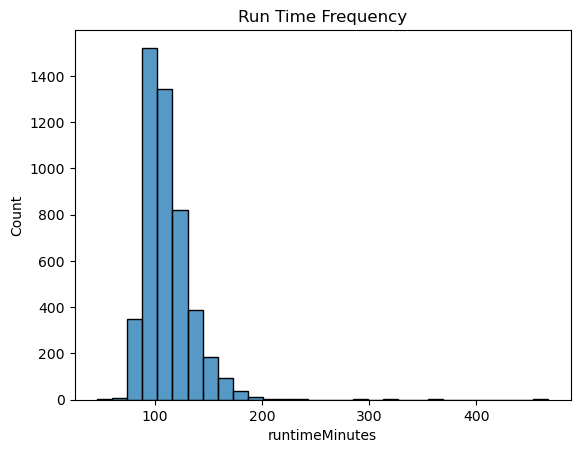

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=imdb_df, x='runtimeMinutes', bins=30)
plt.title('Run Time Frequency')
plt.show()


In [6]:
import matplotlib.pyplot as plt

# create a scatter plot of movie rating
plt.scatter(imdb_df.index, imdb_df['averageRating'], alpha=0.5)

# set the plot title and axes labels
plt.title('Movie Rating')
plt.xlabel('Movie ID')
plt.ylabel('Average Rating')

# display the plot
plt.show()


KeyboardInterrupt: 

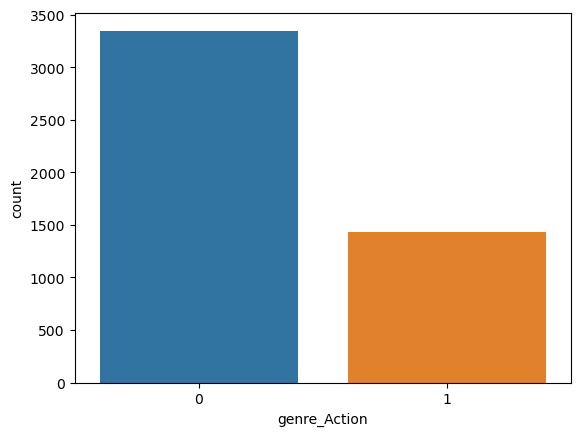

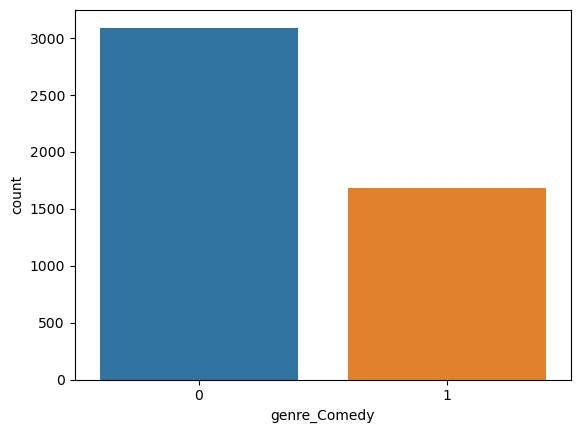

In [7]:
sns.countplot(data=imdb_df, x='genre_Action')
plt.show()

sns.countplot(data=imdb_df, x='genre_Comedy')
plt.show()


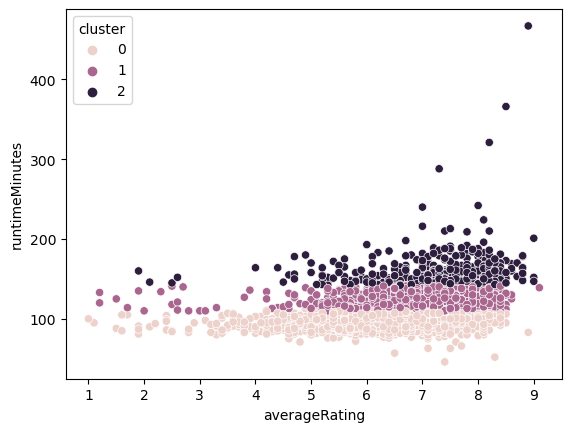

In [8]:
from sklearn.cluster import KMeans

X = imdb_df[['runtimeMinutes', 'averageRating']]
kmeans = KMeans(n_clusters=3, random_state=102)
kmeans.fit(X)
labels = kmeans.labels_
imdb_df['cluster'] = labels
sns.scatterplot(data=imdb_df, y='runtimeMinutes', x='averageRating', hue='cluster')
plt.show()


In [9]:
bins = [2.4, 5.0, 7.4, 10]
labels = ['Terrible', 'Poor', 'Average']
imdb_df['binRating'] = pd.cut(imdb_df['averageRating'], bins=bins, labels=labels, include_lowest=False)
counts = imdb_df['binRating'].value_counts()
print(counts)


Poor        3660
Average      837
Terrible     256
Name: binRating, dtype: int64


In [10]:
bins = [2.4, 5.0, 7.4, 10]
labels = ['Poor', 'Average', 'Excellent']
imdb_df['binRating'] = pd.cut(imdb_df['averageRating'], bins=bins, labels=labels, include_lowest=False)
counts = imdb_df['binRating'].value_counts()
print(counts)

Average      3660
Excellent     837
Poor          256
Name: binRating, dtype: int64


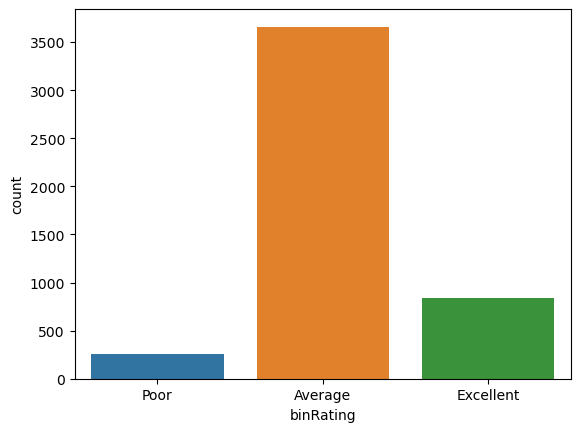

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=imdb_df, x='binRating')
plt.show()

In [12]:
bins = [0, 2.4, 5.0, 7.4, 10]
labels = ['Terrible', 'Poor', 'Average', 'Excellent']
imdb_df['binRating'] = pd.cut(imdb_df['averageRating'], bins=bins, labels=labels, include_lowest=False)
counts = imdb_df['binRating'].value_counts()
print(counts)

Average      3660
Excellent     837
Poor          256
Terrible       24
Name: binRating, dtype: int64


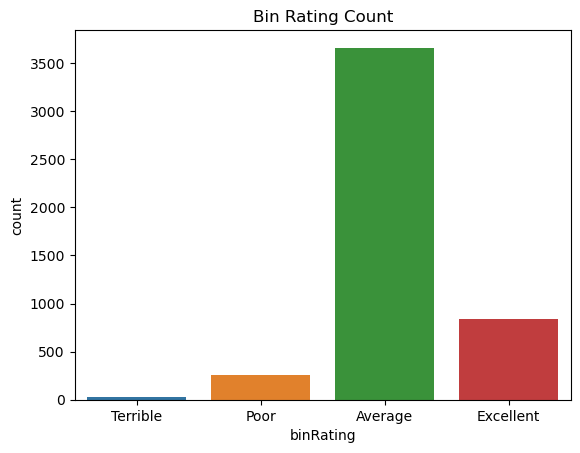

In [24]:
sns.countplot(data=imdb_df, x='binRating')
plt.title('Bin Rating Count')
plt.show()


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# create countplot
ax = sns.countplot(data=imdb_df, x='binRating')

# add labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# add titles and axis labels
plt.title('Bin Rating Frequency')
plt.xlabel('Bin Rating')
plt.ylabel('Count')
plt.ylim(0, 4000)

plt.show()


ValueError: Could not interpret input 'binRating'

In [14]:
counts = imdb_df.groupby('binRating').size()
print(counts)


binRating
Terrible       24
Poor          256
Average      3660
Excellent     837
dtype: int64


In [15]:
genre_counts = imdb_df['genre_Action'].value_counts()
print(genre_counts)

genre_counts = imdb_df['genre_Action'].value_counts()
print(genre_counts)


0    3348
1    1429
Name: genre_Action, dtype: int64
0    3348
1    1429
Name: genre_Action, dtype: int64


Action 1429
Adventure 959
Animation 270
Biography 402
Comedy 1684
Crime 970
Documentary 84
Drama 2575
Family 216
Fantasy 388
History 162
Horror 610
Music 129
Musical 46
Mystery 553
News 3
Romance 749
Sci-Fi 366
Sport 105
Thriller 825
War 64
Western 19


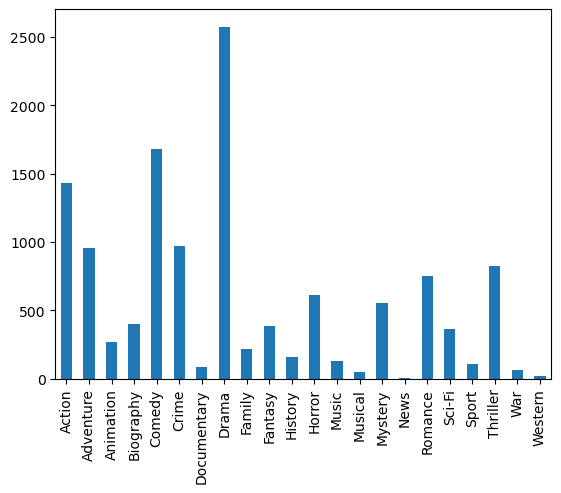

In [16]:
genre_cols = [col for col in imdb_df.columns if col.startswith('genre_')]
counts = imdb_df[genre_cols].sum()
counts.index = counts.index.str.replace('genre_', '')
counts.plot(kind='bar')

for col, count in counts.items():
    print (col, count)


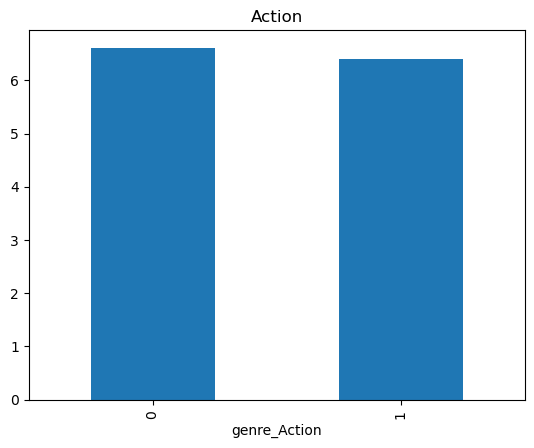

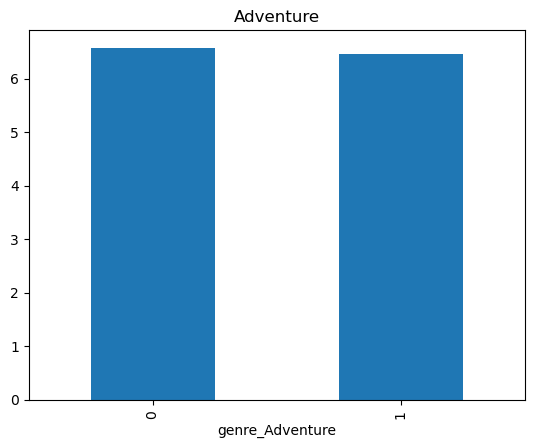

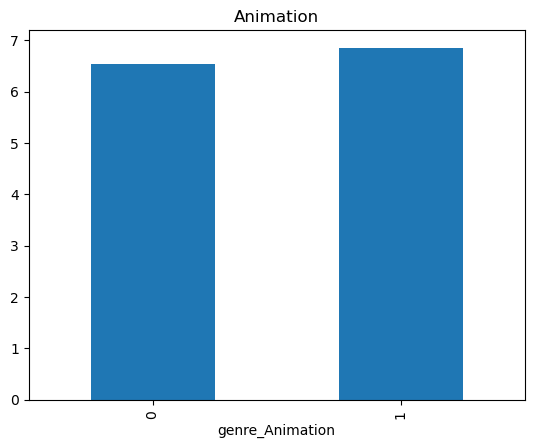

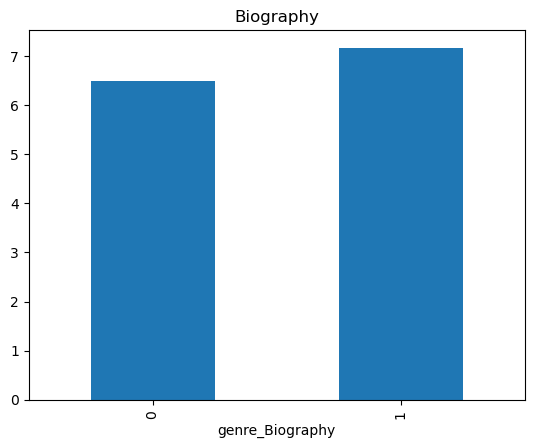

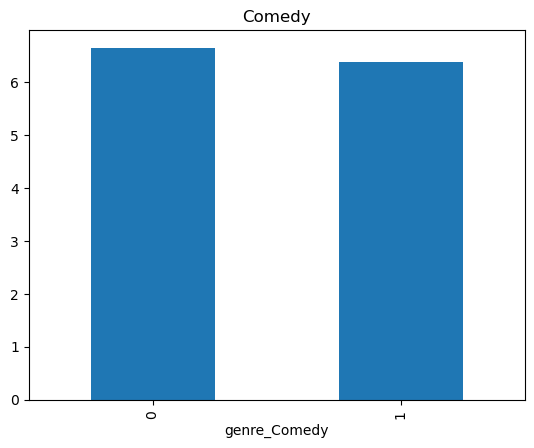

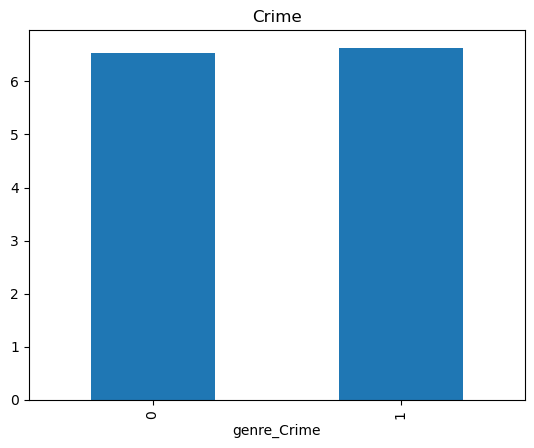

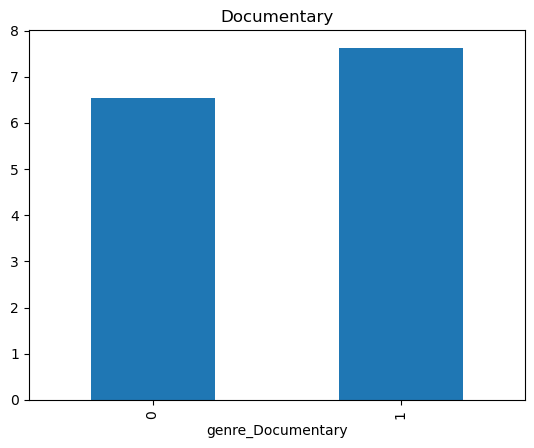

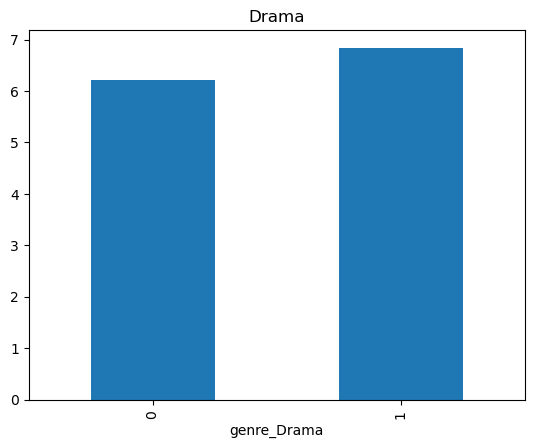

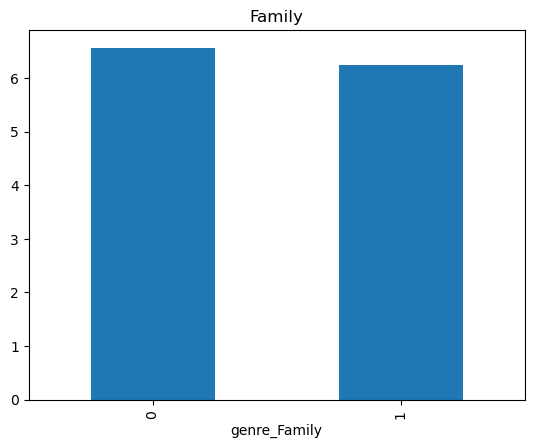

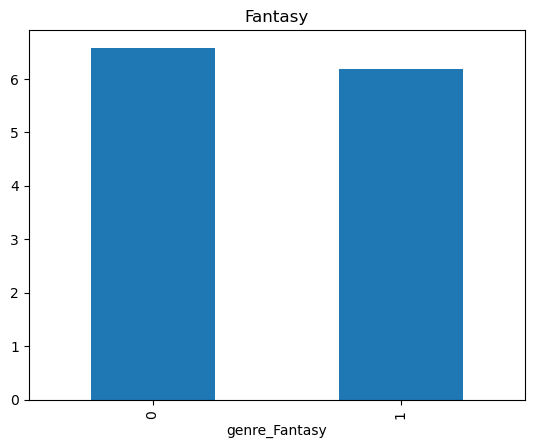

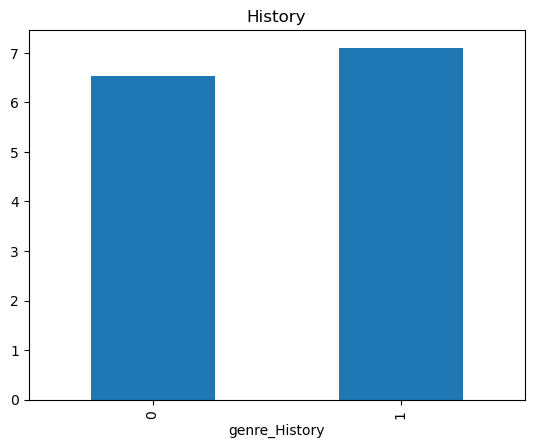

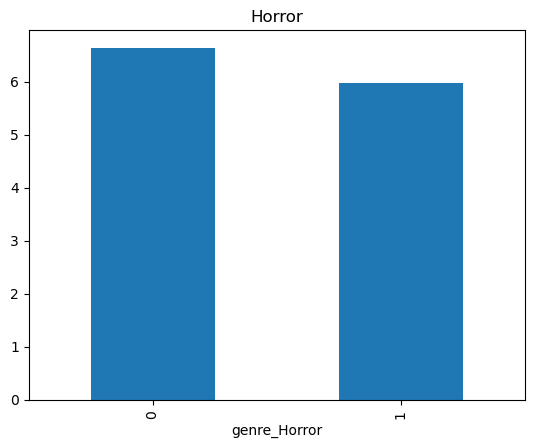

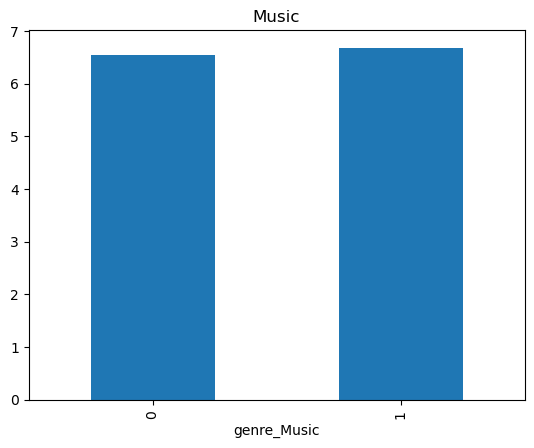

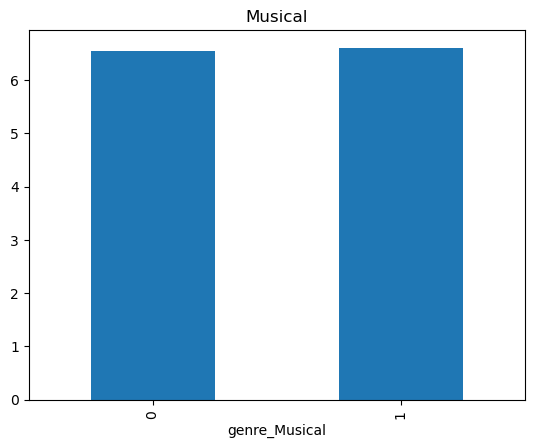

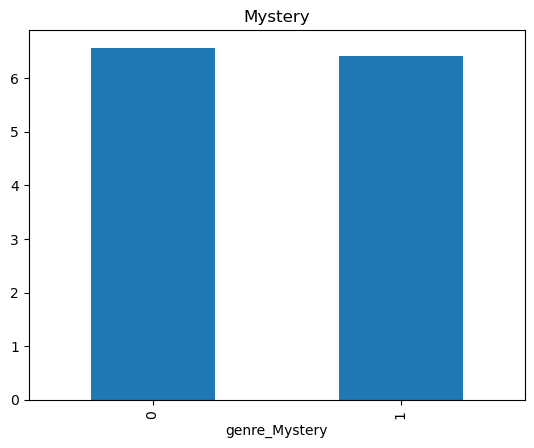

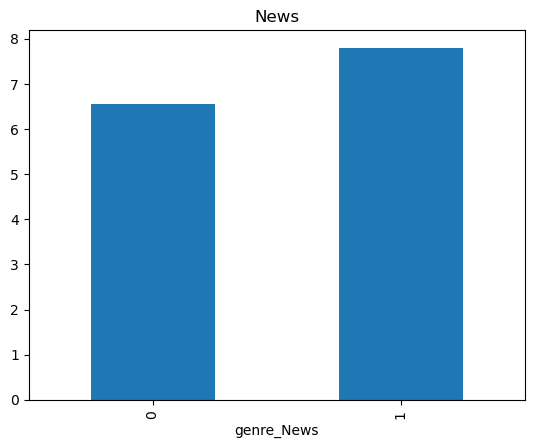

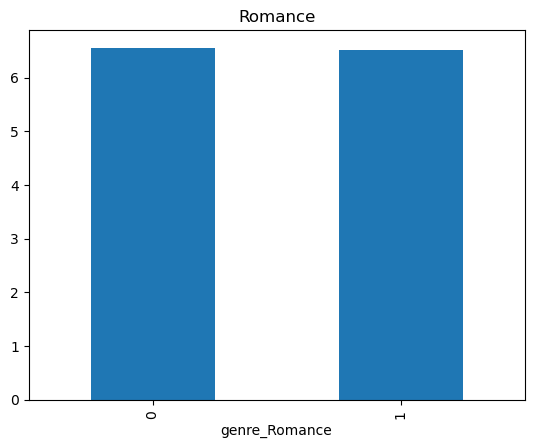

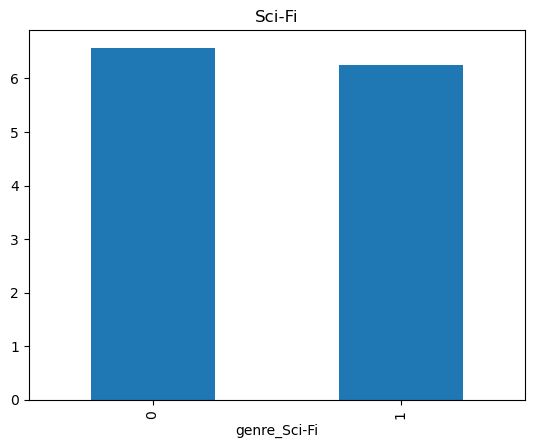

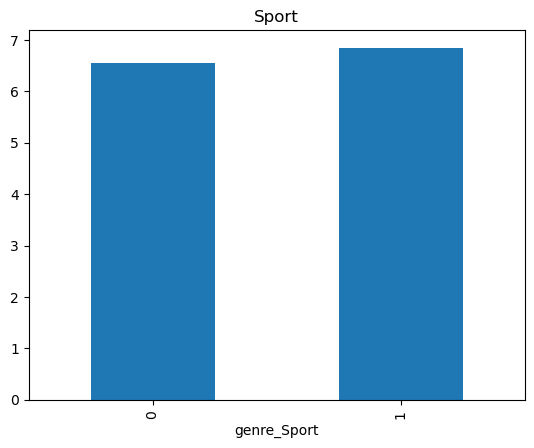

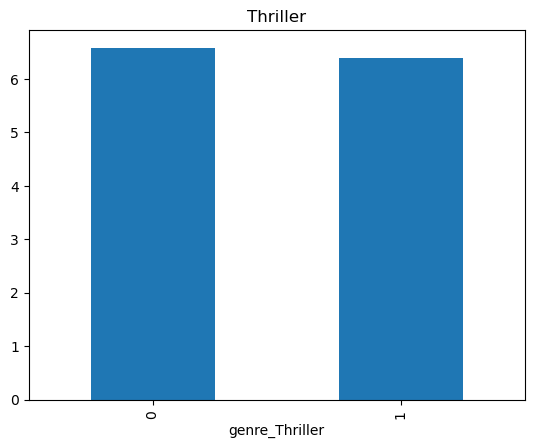

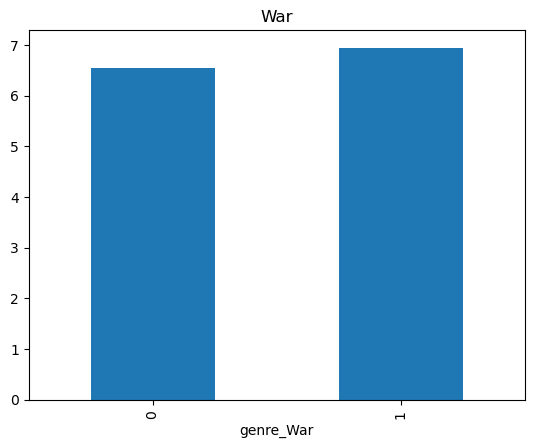

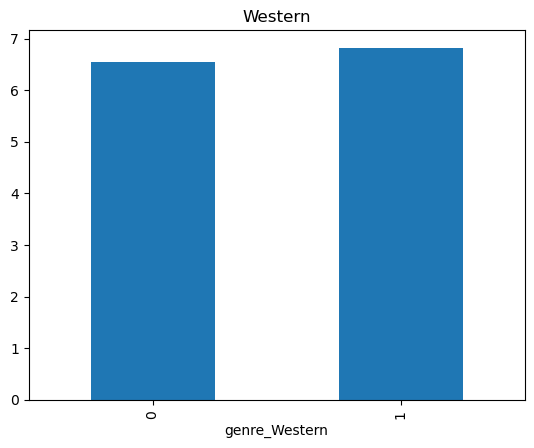

In [17]:
genre_cols = [col for col in imdb_df.columns if col.startswith('genre_')]
for genre_col in genre_cols:
    genre = genre_col.split('_')[1]  # extract genre name
    mean_ratings = imdb_df.groupby(genre_col)['averageRating'].mean()
    mean_ratings.plot(kind='bar', title=genre)
    plt.show()


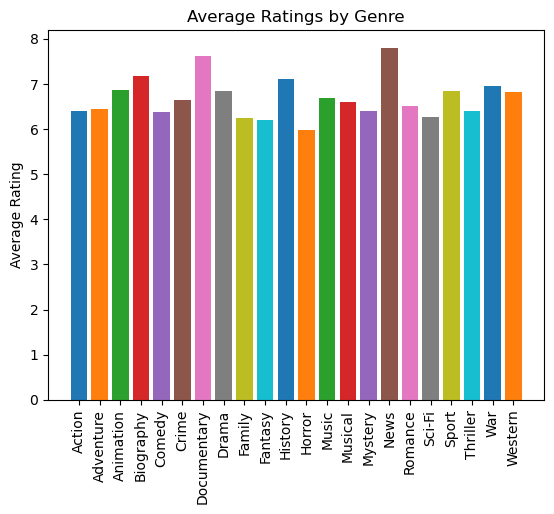

In [18]:
genre_cols = [col for col in imdb_df.columns if col.startswith('genre_')]
for genre_col in genre_cols:
    genre = genre_col.split('_')[1]  # extract genre name
    genre_ratings = imdb_df[imdb_df[genre_col] == 1]['averageRating']  # select only '1' values of genre column
    mean_rating = genre_ratings.mean()  # calculate mean rating
    plt.bar(genre, mean_rating)  # create bar plot
    
plt.title('Average Ratings by Genre')
plt.ylabel('Average Rating')

# rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

plt.show()


In [19]:
genre_cols = [col for col in imdb_df.columns if col.startswith('genre_')]
genre_means = []
for genre_col in genre_cols:
    genre = genre_col.split('_')[1]
    genre_ratings = imdb_df[imdb_df[genre_col] == 1]['averageRating']
    mean_rating = genre_ratings.mean()
    genre_means.append((genre, mean_rating))
genre_means.sort(key=lambda x: x[1])
for genre_mean in genre_means:
    print(f"{genre_mean[0]}: {genre_mean[1]:.2f}")


Horror: 5.97
Fantasy: 6.19
Family: 6.24
Sci-Fi: 6.26
Comedy: 6.37
Thriller: 6.39
Action: 6.40
Mystery: 6.41
Adventure: 6.45
Romance: 6.51
Musical: 6.60
Crime: 6.64
Music: 6.68
Western: 6.82
Drama: 6.84
Sport: 6.85
Animation: 6.86
War: 6.94
History: 7.10
Biography: 7.17
Documentary: 7.63
News: 7.80


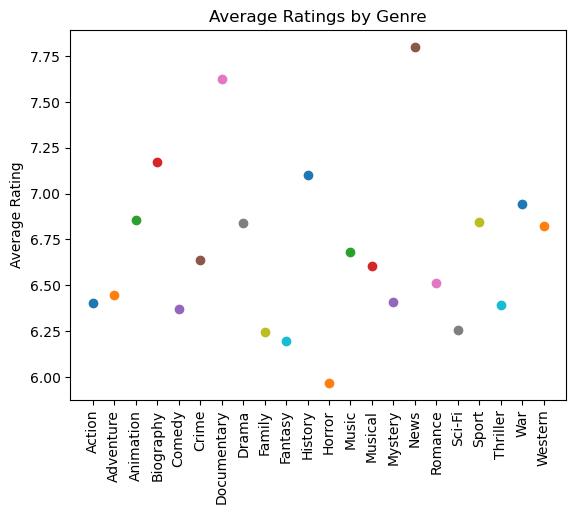

In [20]:
genre_cols = [col for col in imdb_df.columns if col.startswith('genre_')]

for genre_col in genre_cols:
    genre = genre_col.split('_')[1]  # extract genre name
    genre_ratings = imdb_df[imdb_df[genre_col] == 1]['averageRating']  # select only '1' values of genre column
    mean_rating = genre_ratings.mean()  # calculate mean rating
    plt.plot(genre, mean_rating, marker='o')  # create line plot with markers
    
plt.title('Average Ratings by Genre')
plt.ylabel('Average Rating')

# rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

plt.show()


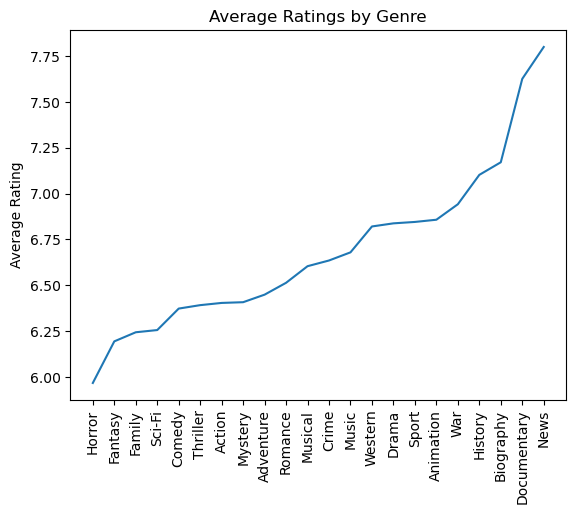

In [21]:
genre_cols = [col for col in imdb_df.columns if col.startswith('genre_')]

# Create a dictionary to store genre and mean rating pairs
genre_ratings = {}
for genre_col in genre_cols:
    genre = genre_col.split('_')[1]  # extract genre name
    genre_ratings[genre] = imdb_df[imdb_df[genre_col] == 1]['averageRating'].mean()  # select only '1' values of genre column and calculate mean rating

# Sort the genre_ratings dictionary by mean rating in ascending order
sorted_genre_ratings = dict(sorted(genre_ratings.items(), key=lambda item: item[1]))

# Plot the line chart
plt.plot(list(sorted_genre_ratings.keys()), list(sorted_genre_ratings.values()))
plt.title('Average Ratings by Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


NameError: name 'x' is not defined

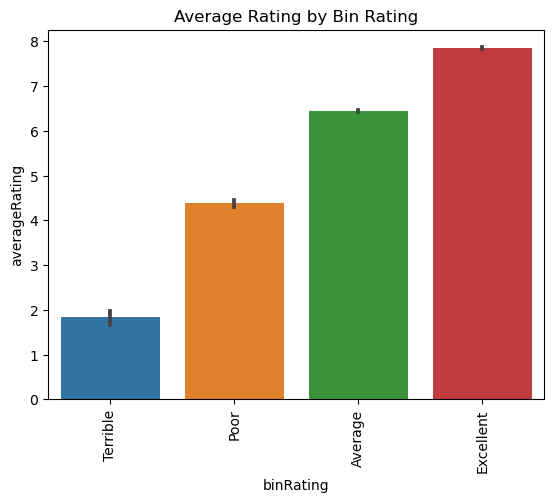

In [29]:
sns.barplot(data=imdb_df, x='binRating', y='averageRating')
plt.title('Average Rating by Bin Rating')
plt.xticks(rotation=90)
plt.text(x, y, round(y, 2), ha='center', va='bottom')
plt.show()

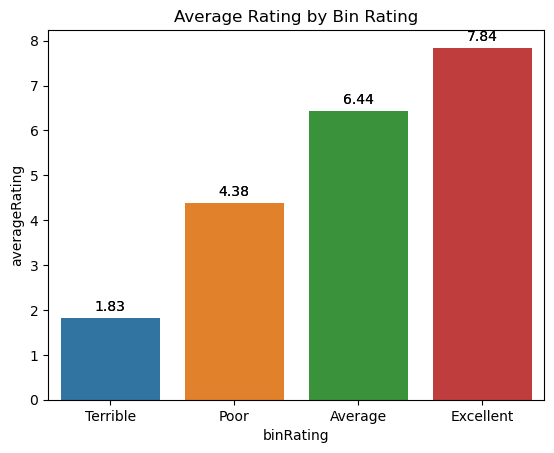

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=imdb_df, x='binRating', y='averageRating', ci=None)

plt.title('Average Rating by Bin Rating')
plt.xlabel('Bin Rating')
plt.ylabel('Average Rating')

# add value labels to each bar
for i, bar in enumerate(sns.barplot(data=imdb_df, x='binRating', y='averageRating', ci=None).patches):
    plt.annotate(round(bar.get_height(), 2), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()


In [ ]:
genre_cols = [col for col in imdb_df.columns if col.startswith('genre_')]
for genre_col in genre_cols:
    genre = genre_col.split('_')[1]  # extract genre name
    genre_ratings = imdb_df[imdb_df[genre_col] == 1]['averageRating']  # select only '1' values of genre column
    mean_rating = genre_ratings.mean()  # calculate mean rating
    plt.bar(genre, mean_rating)  # create bar plot
    plt.text(genre, mean_rating, round(mean_rating, 2), ha='center', va='bottom')  # add text label for value
    
plt.title('Average Ratings by Genre')
plt.ylabel('Average Rating')

# rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

plt.show()

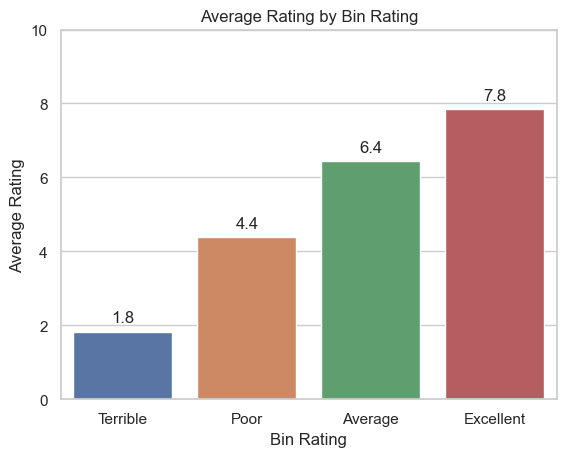

In [33]:
import seaborn as sns

sns.set_style('whitegrid')

ax = sns.barplot(data=imdb_df, x='binRating', y='averageRating', ci=None)
ax.set_title('Average Rating by Bin Rating')
ax.set_xlabel('Bin Rating')
ax.set_ylabel('Average Rating')
ax.set_ylim([0, 10])
ax.set_yticks([0, 2, 4, 6, 8, 10])
ax.set_yticklabels(['0', '2', '4', '6', '8', '10'])
ax.grid(True, axis='y')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')


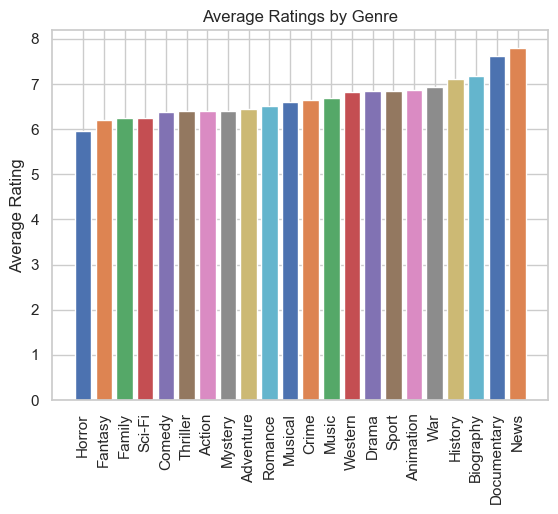

In [35]:
genre_cols = [col for col in imdb_df.columns if col.startswith('genre_')]
genre_means = []
for genre_col in genre_cols:
    genre = genre_col.split('_')[1]  # extract genre name
    genre_ratings = imdb_df[imdb_df[genre_col] == 1]['averageRating']  # select only '1' values of genre column
    mean_rating = genre_ratings.mean()  # calculate mean rating
    genre_means.append((genre, mean_rating))

# Sort the genre_means list in ascending order based on the mean_rating values
genre_means = sorted(genre_means, key=lambda x: x[1], reverse=False)

# Create the bar plot with the sorted genre_means list
for genre, mean_rating in genre_means:
    plt.bar(genre, mean_rating)  # create bar plot
    
plt.title('Average Ratings by Genre')
plt.ylabel('Average Rating')

# rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

plt.show()


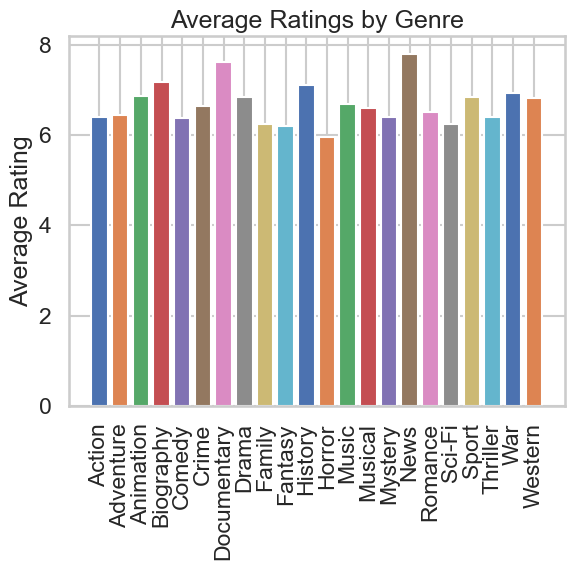

In [36]:
import seaborn as sns

# set style and context
sns.set_style('whitegrid')
sns.set_context('talk')

genre_cols = [col for col in imdb_df.columns if col.startswith('genre_')]
for genre_col in genre_cols:
    genre = genre_col.split('_')[1]  # extract genre name
    genre_ratings = imdb_df[imdb_df[genre_col] == 1]['averageRating']  # select only '1' values of genre column
    mean_rating = genre_ratings.mean()  # calculate mean rating
    plt.bar(genre, mean_rating)  # create bar plot
    
plt.title('Average Ratings by Genre')
plt.ylabel('Average Rating')

# rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

plt.show()


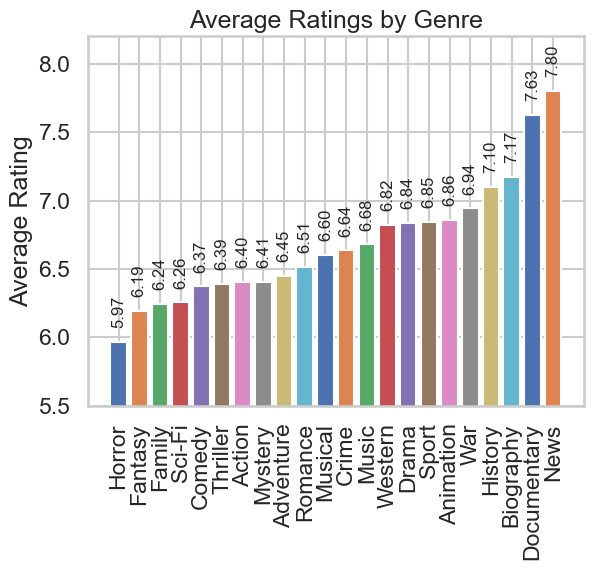

In [48]:
genre_cols = [col for col in imdb_df.columns if col.startswith('genre_')]
fig, ax = plt.subplots()

# Create a list to store the mean ratings
mean_ratings = []
for genre_col in genre_cols:
    genre = genre_col.split('_')[1]  # extract genre name
    genre_ratings = imdb_df[imdb_df[genre_col] == 1]['averageRating']  # select only '1' values of genre column
    mean_rating = genre_ratings.mean()  # calculate mean rating
    mean_ratings.append((genre, mean_rating)) # append the genre and mean rating as a tuple

# Sort the mean ratings in ascending order
mean_ratings = sorted(mean_ratings, key=lambda x: x[1])

# Create the bar plot
for i, (genre, mean_rating) in enumerate(mean_ratings):
    ax.bar(genre, mean_rating)
    ax.text(i, mean_rating+0.1, f'{mean_rating:.2f}', rotation='90', fontsize='12', ha='center', va='bottom') # add the y-value label

# Set the axis labels, limits and tick label rotation
ax.set_title('Average Ratings by Genre')
ax.set_ylabel('Average Rating')
ax.set_ylim([5.5, 8.2])
ax.tick_params(axis='x', rotation=90)

plt.show()


TypeError: can only concatenate tuple (not "float") to tuple

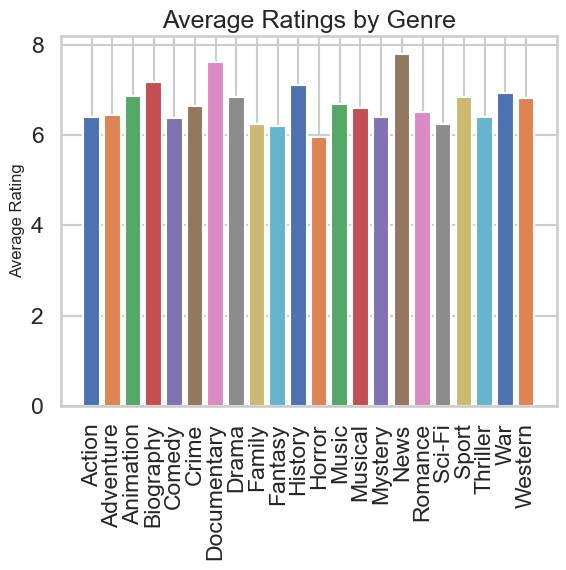

In [44]:
genre_cols = [col for col in imdb_df.columns if col.startswith('genre_')]
for genre_col in genre_cols:
    genre = genre_col.split('_')[1]  # extract genre name
    genre_ratings = imdb_df[imdb_df[genre_col] == 1]['averageRating']  # select only '1' values of genre column
    mean_rating = genre_ratings.mean()  # calculate mean rating
    plt.bar(genre, mean_rating)  # create bar plot
    
plt.title('Average Ratings by Genre')
plt.ylabel('Average Rating', fontsize=12)

# rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# add y-value labels to the bars
for i, v in enumerate(mean_ratings):
    plt.text(i, v + 0.1, str(round(v, 2)), fontsize=8, ha='center')

# set y-axis range from 5 to 8
plt.ylim(5, 8)

plt.show()


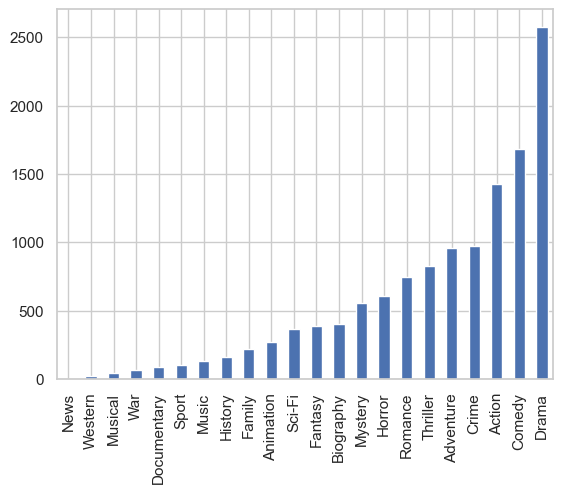

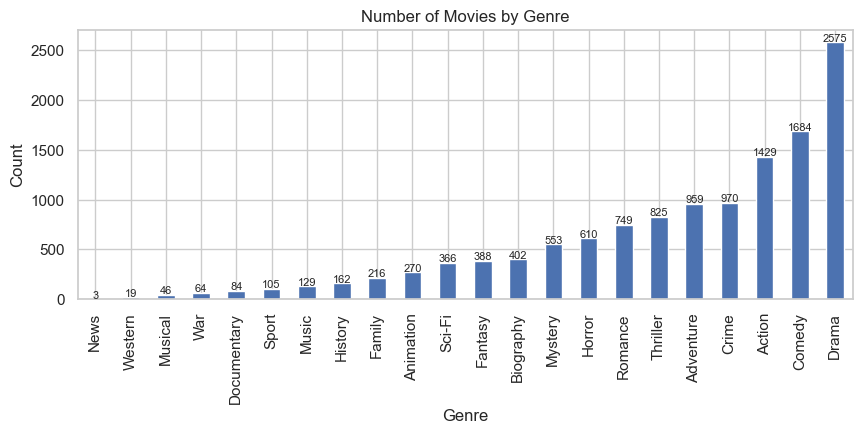

In [8]:
genre_cols = [col for col in imdb_df.columns if col.startswith('genre_')]
counts = imdb_df[genre_cols].sum()
counts.index = counts.index.str.replace('genre_', '')
counts = counts.sort_values()
counts.plot(kind='bar')

fig, ax = plt.subplots(figsize = (10,3.5))

counts.plot(kind='bar', ax=ax)

# add y-value labels to the bars
for i, v in enumerate(counts):
    ax.text(i, v + 10, str(v), fontsize=8, ha='center')

# set the axis labels, title, and limits
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Number of Movies by Genre')
ax.set_ylim([0, 2700])

# rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

plt.show()


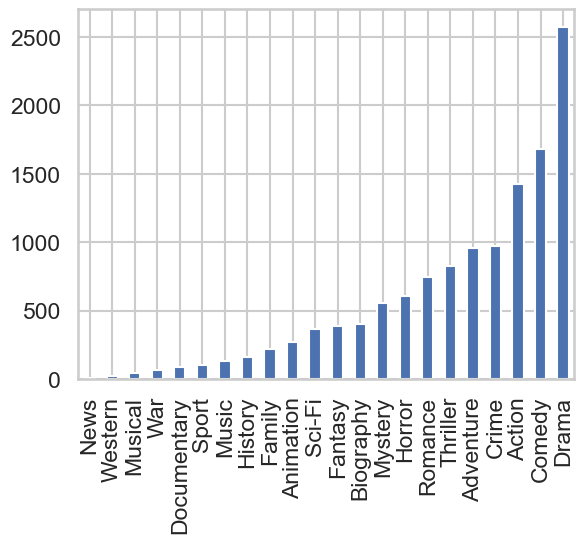

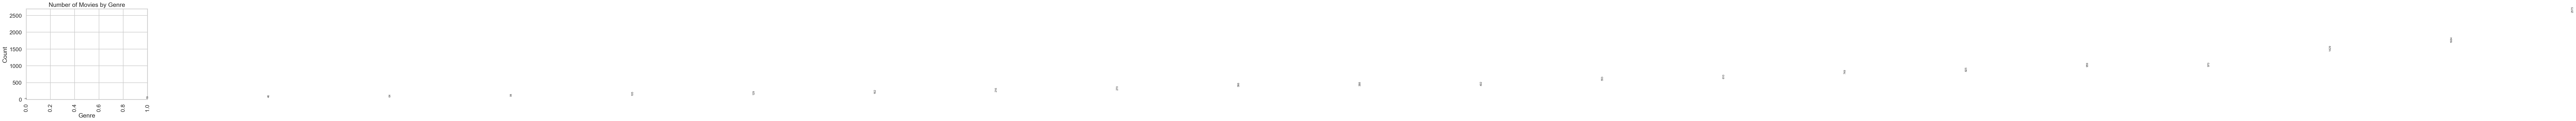

In [57]:
genre_cols = [col for col in imdb_df.columns if col.startswith('genre_')]
counts = imdb_df[genre_cols].sum()
counts.index = counts.index.str.replace('genre_', '')
counts = counts.sort_values()
counts.plot(kind='bar')

fig, ax = plt.subplots()

# add y-value labels to the bars
for i, v in enumerate(counts):
    ax.text(i, v + 10, str(v), rotation=90, ha='center', va='bottom', fontsize=8)

# set the axis labels, title, and limits
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Number of Movies by Genre')
ax.set_ylim([0, 2700])

# rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

plt.show()
